In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import requests
import base64
import numpy as np
import cv2
import matplotlib.pyplot as plt

def fetch_images(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    else:
        print("Failed to fetch data")
        return []

def decode_image(base64_str):
    base64_str = base64_str.split(",")[1]  # Remove 'data:image/jpeg;base64,' part
    img_data = base64.b64decode(base64_str)
    nparr = np.frombuffer(img_data, np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

# Example usage
images_data = fetch_images("http://34.45.14.63:3000/api/photo/")


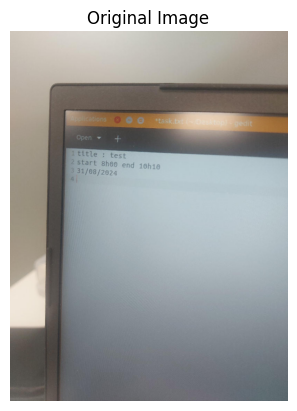

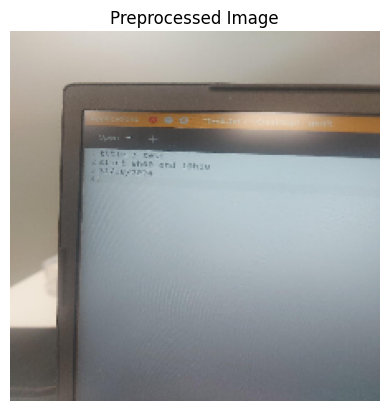

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img):
    # Resize with interpolation for better quality
    img_resized = cv2.resize(img, (224, 224), interpolation=cv2.INTER_CUBIC)
    # Normalize pixel values to range [0, 1]
    img_normalized = img_resized / 255.0
    return img_normalized

def display_image(img, title="Image"):
    # Convert the image to a format suitable for display
    if img.dtype == np.float32 or img.dtype == np.float64:
        img = (img * 255).astype(np.uint8)  # Convert to uint8 if in float format
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Example usage
for image_data in images_data:
    original_img = decode_image(image_data['imageData'])
    display_image(original_img, title="Original Image")
    
    preprocessed_img = preprocess_image(original_img)
    display_image(preprocessed_img, title="Preprocessed Image")


In [5]:
import torch
print(torch.__version__)


2.4.0


In [8]:
import torch
from torchvision import models, transforms

# Define the transformation
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

# Load a pre-trained model (e.g., ResNet)
model = models.resnet50(pretrained=True)
model.eval()  # Set model to evaluation mode

def extract_features(image, model):
    # Transform and prepare image
    img_t = transform(image)
    img_t = img_t.unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        features = model(img_t)
    return features

# Example usage
for image_data in images_data:
    original_img = decode_image(image_data['imageData'])
    features = extract_features(original_img, model)
    print(f"Extracted features shape: {features.shape}")



/home/hamoud/miniconda3/envs/tf/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/hamoud/miniconda3/envs/tf/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Extracted features shape: torch.Size([1, 1000])


In [9]:
import pytesseract
from transformers import pipeline

# Set up OCR (Ensure tesseract is installed)
def extract_text(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    text = pytesseract.image_to_string(gray)
    return text

# NLP pipeline for text analysis
nlp = pipeline("ner")

# Example usage
for image_data in images_data:
    original_img = decode_image(image_data['imageData'])
    extracted_text = extract_text(original_img)
    print("Extracted Text:", extracted_text)
    
    nlp_results = nlp(extracted_text)
    print("NLP Analysis:", nlp_results)


No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


RuntimeError: Failed to import transformers.models.bert.modeling_tf_bert because of the following error (look up to see its traceback):
Your currently installed version of Keras is Keras 3, but this is not yet supported in Transformers. Please install the backwards-compatible tf-keras package with `pip install tf-keras`.

In [ ]:
def parse_task(extracted_text):
    # Example parsing logic (implement your specific rules)
    # Placeholder implementation
    task = {
        "title": "Extracted Task Title",
        "note": extracted_text,  # Full extracted text
        "priority": 3,           # Based on analysis
        "difficulty": 2,         # Based on analysis
        "userId": "extracted_user_id",  # From API data
        "action": "add"          # Or "update"
    }
    return task

# Example usage
for image_data in images_data:
    original_img = decode_image(image_data['imageData'])
    extracted_text = extract_text(original_img)
    task = parse_task(extracted_text)
    print("Parsed Task:", task)
